In [15]:
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Paired')
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import time
import random
import math
import pandas as pd
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
%matplotlib inline

## Main text - Figure 2

#### Load data

In [12]:
N_0_reg = np.load("Data/Regular/ave/N_ave_0.npy")
N_1_reg = np.load("Data/Regular/ave/N_ave_1.npy")
N_0_rand = np.load("Data/Random/ave/N_ave_0.npy")
N_1_rand = np.load("Data/Random/ave/N_ave_1.npy")

#### Create array for indexing V values

In [13]:
V_vals = np.linspace(0,0.2,30)

#### Generate figure

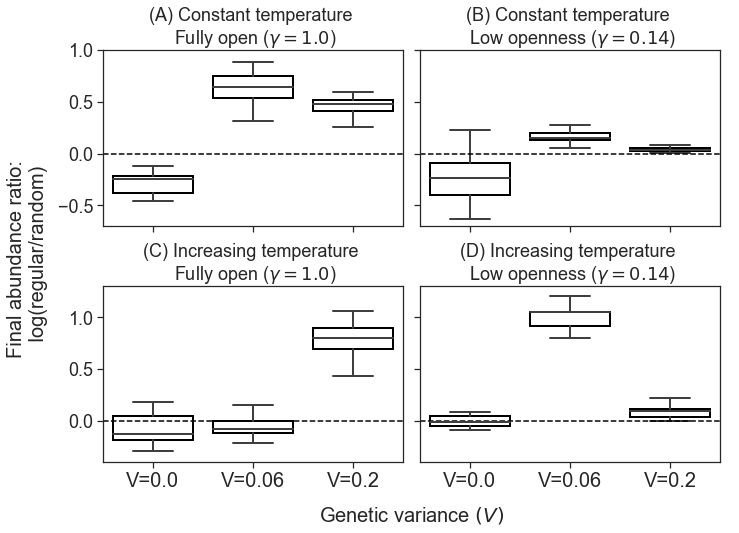

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(11,8))
ax_big = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax_big.set_ylabel('Final abundance ratio: \n log(regular/random)', fontsize=20, labelpad=20)
#ax_big.set_xlabel('Additive genetic variance: log(' + r'$V+1$)', fontsize=20, labelpad=15)
ax_big.set_xlabel('Genetic variance '+ r'$(V)$', fontsize=20, labelpad=15)
x_range = np.linspace(0,0.2,30)
ymin = -0.05
ymax = 1.2

alpha1 = 0
alpha2 = 25

V1=0
V2=9
V3=29

V_label1 = 'V=' + str(np.round(V_vals[V1], decimals=2))
V_label2 = 'V=' + str(np.round(V_vals[V2], decimals=2)) 
V_label3 = 'V=' + str(np.round(V_vals[V3], decimals=2)) 

FS = 18

alpha=alpha1
abundance = np.concatenate((np.log(N_0_reg[V1,alpha,:]/N_0_rand[V1,alpha,:]),
                            np.log(N_0_reg[V2,alpha,:]/N_0_rand[V2,alpha,:]),
                            np.log(N_0_reg[V3,alpha,:]/N_0_rand[V3,alpha,:])))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),20),
                       np.repeat(np.round(V_vals[V2],decimals=2),20),
                       np.repeat(np.round(V_vals[V3],decimals=2),20)
                      ))
zipped = zip(abundance,vals)
df = pd.DataFrame(zipped, columns = ['Ratio', 'V']) 
sns.boxplot(x='V', y='Ratio', data=df, showfliers=False, linewidth=2., ax=ax[0,0])
ax[0,0].set(xlabel='', ylabel='')
ax[0,0].set_title('(A) Constant temperature \n Fully open (' + r'$\gamma = 1.0$)', fontsize=FS)
ax[0,0].set_xticklabels([],fontsize=20) 
ax[0,0].set_ylim([-.7,1])
ax[0,0].axhline(y=0, color='k', linestyle='--')

for i,artist in enumerate(ax[0,0].artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor('k')
    artist.set_facecolor('None')

###
alpha=alpha2
abundance = np.concatenate((np.log(N_0_reg[V1,alpha,:]/N_0_rand[V1,alpha,:]),
                            np.log(N_0_reg[V2,alpha,:]/N_0_rand[V2,alpha,:]),
                            np.log(N_0_reg[V3,alpha,:]/N_0_rand[V3,alpha,:])))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),20),
                       np.repeat(np.round(V_vals[V2],decimals=2),20),
                       np.repeat(np.round(V_vals[V3],decimals=2),20)
                      ))
zipped = zip(abundance,vals)
df = pd.DataFrame(zipped, columns = ['Ratio', 'V']) 
sns.boxplot(x='V', y='Ratio', data=df, showfliers=False, linewidth=2., ax=ax[0,1])
ax[0,1].set(xlabel='', ylabel='')
ax[0,1].set_title('(B) Constant temperature \n Low openness (' + r'$\gamma = 0.14$)', fontsize=FS)
ax[0,1].set_xticklabels([],fontsize=20) 
ax[0,1].set_yticklabels([],fontsize=20) 
ax[0,1].set_ylim([-.7,1])
ax[0,1].axhline(y=0, color='k', linestyle='--')

for i,artist in enumerate(ax[0,1].artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor('k')
    artist.set_facecolor('None')


###
alpha=alpha1
abundance = np.concatenate((np.log(N_1_reg[V1,alpha,:]/N_1_rand[V1,alpha,:]),
                            np.log(N_1_reg[V2,alpha,:]/N_1_rand[V2,alpha,:]),
                            np.log(N_1_reg[V3,alpha,:]/N_1_rand[V3,alpha,:])))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),20),
                       np.repeat(np.round(V_vals[V2],decimals=2),20),
                       np.repeat(np.round(V_vals[V3],decimals=2),20)
                      ))
zipped = zip(abundance,vals)
df = pd.DataFrame(zipped, columns = ['Ratio', 'V']) 
sns.boxplot(x='V', y='Ratio', data=df, showfliers=False, linewidth=2., ax=ax[1,0])
ax[1,0].set(xlabel='', ylabel='')
ax[1,0].set_title('(C) Increasing temperature \n Fully open (' + r'$\gamma = 1.0$)', fontsize=FS)
ax[1,0].set_xticklabels([V_label1,V_label2,V_label3],fontsize=20) 
ax[1,0].set_ylim([-.4,1.3])
ax[1,0].axhline(y=0, color='k', linestyle='--')

for i,artist in enumerate(ax[1,0].artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor('k')
    artist.set_facecolor('None')    
    
    
###
alpha=alpha2
abundance = np.concatenate((np.log(N_1_reg[V1,alpha,:]/N_1_rand[V1,alpha,:]),
                            np.log(N_1_reg[V2,alpha,:]/N_1_rand[V2,alpha,:]),
                            np.log(N_1_reg[V3,alpha,:]/N_1_rand[V3,alpha,:])))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),20),
                       np.repeat(np.round(V_vals[V2],decimals=2),20),
                       np.repeat(np.round(V_vals[V3],decimals=2),20)
                      ))
zipped = zip(abundance,vals)
df = pd.DataFrame(zipped, columns = ['Ratio', 'V']) 
sns.boxplot(x='V', y='Ratio', data=df, showfliers=False, linewidth=2., ax=ax[1,1])
ax[1,1].set(xlabel='', ylabel='')
ax[1,1].set_title('(D) Increasing temperature \n Low openness (' + r'$\gamma = 0.14$)', fontsize=FS)
ax[1,1].set_xticklabels([V_label1,V_label2,V_label3],fontsize=20) 
ax[1,1].set_yticklabels([],fontsize=20) 
ax[1,1].set_ylim([-.4,1.3])
ax[1,1].axhline(y=0, color='k', linestyle='--')

for i,artist in enumerate(ax[1,1].artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor('k')
    artist.set_facecolor('None')   
    
plt.tight_layout()
plt.savefig("Figures/Fig2.png", dpi=600, bbox_inches='tight')

## Main text - Figure 3

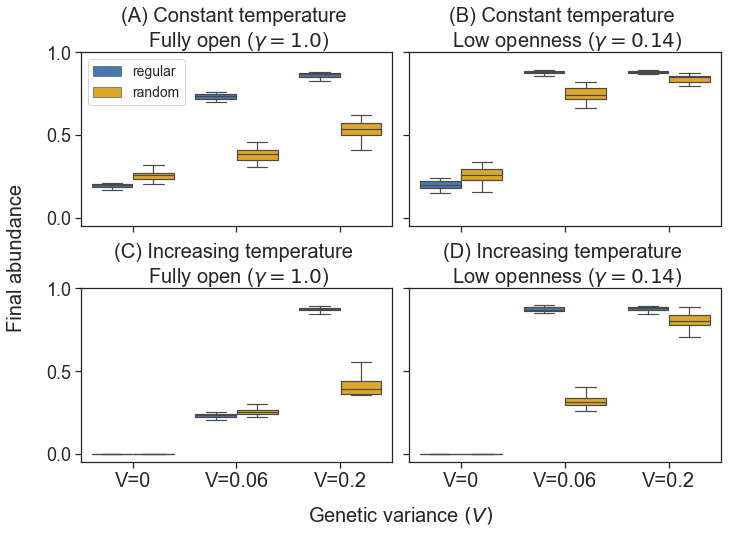

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(11,8))
ax_big = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
ax_big.set_ylabel('Final abundance', fontsize=20, labelpad=20)
ax_big.set_xlabel('Genetic variance '+ r'$(V)$', fontsize=20, labelpad=15)
x_range = np.linspace(0,0.2,30)
ymin = -0.05
ymax = 1.2

category =['regular']*20 + ['random']*20 + ['regular']*20 + ['random']*20 + ['regular']*20 + ['random']*20

alpha1 = 0
alpha2 = 25

V1=0
V2=9
V3=29

V_label1 = 'V=' + str(np.round(V_vals[V1], decimals=2))
V_label2 = 'V=' + str(np.round(V_vals[V2], decimals=2)) 
V_label3 = 'V=' + str(np.round(V_vals[V3], decimals=2)) 

FS = 18
###
alpha = alpha1
abundance = np.concatenate((N_0_reg[V1,alpha,:],N_0_rand[V1,alpha,:],
                            N_0_reg[V2,alpha,:],N_0_rand[V2,alpha,:],
                            N_0_reg[V3,alpha,:],N_0_rand[V3,alpha,:]))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),40),
                       np.repeat(np.round(V_vals[V2],decimals=2),40),
                       np.repeat(np.round(V_vals[V3],decimals=2),40)))

zipped = zip(abundance,vals,category)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Variance', 'network']) 
colors = ["windows blue", "amber"]
mypal = sns.xkcd_palette(colors)
sns.boxplot(x='Variance', y='Abundance', hue='network',data=df, showfliers=False, 
                 palette=mypal, linewidth=1.2, ax=ax[0,0])
ax[0,0].set_title("(A) Constant temperature \n Fully open (" + r'$\gamma=1.0$)', fontsize=20)
ax[0,0].set(xlabel='', ylabel='')
ax[0,0].set_xticklabels([],fontsize=20)
ax[0,0].set_ylim([-0.05,1.0])
ax[0,0].legend(loc="upper left",fontsize=14)


###
alpha = alpha2
abundance = np.concatenate((N_0_reg[V1,alpha,:],N_0_rand[V1,alpha,:],
                            N_0_reg[V2,alpha,:],N_0_rand[V2,alpha,:],
                            N_0_reg[V3,alpha,:],N_0_rand[V3,alpha,:]))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),40),
                       np.repeat(np.round(V_vals[V2],decimals=2),40),
                       np.repeat(np.round(V_vals[V3],decimals=2),40)))

zipped = zip(abundance,vals,category)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Variance', 'network']) 
colors = ["windows blue", "amber"]
mypal = sns.xkcd_palette(colors)
sns.boxplot(x='Variance', y='Abundance', hue='network', data=df, showfliers=False, 
                 palette=mypal, linewidth=1.2, ax=ax[0,1])
ax[0,1].set_title("(B) Constant temperature \n Low openness (" + r'$\gamma=0.14$)', fontsize=20)
ax[0,1].set(xlabel='', ylabel='')
ax[0,1].set_xticklabels([],fontsize=20)
ax[0,1].set_yticklabels([],fontsize=20)
ax[0,1].set_ylim([-0.05,1.0])
ax[0,1].legend(loc="best",fontsize=16)
ax[0,1].get_legend().remove()

###
alpha=alpha1
abundance = np.concatenate((N_1_reg[V1,alpha,:],N_1_rand[V1,alpha,:],
                            N_1_reg[V2,alpha,:],N_1_rand[V2,alpha,:],
                            N_1_reg[V3,alpha,:],N_1_rand[V3,alpha,:]))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),40),
                       np.repeat(np.round(V_vals[V2],decimals=2),40),
                       np.repeat(np.round(V_vals[V3],decimals=2),40)))

zipped = zip(abundance,vals,category)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Variance', 'network']) 
colors = ["windows blue", "amber"]
mypal = sns.xkcd_palette(colors)
sns.boxplot(x='Variance', y='Abundance', hue='network',data=df, showfliers=False, 
                 palette=mypal, linewidth=1.2, ax=ax[1,0])
ax[1,0].set_title("(C) Increasing temperature \n Fully open (" + r'$\gamma=1.0$)', fontsize=20)
ax[1,0].set(xlabel='', ylabel='')
ax[1,0].set_xticklabels(['V=0','V=0.06','V=0.2'],fontsize=20)
ax[1,0].set_ylim([-0.05,1.0])
ax[1,0].get_legend().remove()
    
###
alpha=alpha2
abundance = np.concatenate((N_1_reg[V1,alpha,:],N_1_rand[V1,alpha,:],
                            N_1_reg[V2,alpha,:],N_1_rand[V2,alpha,:],
                            N_1_reg[V3,alpha,:],N_1_rand[V3,alpha,:]))
vals = np.concatenate((np.repeat(np.round(V_vals[V1],decimals=2),40),
                       np.repeat(np.round(V_vals[V2],decimals=2),40),
                       np.repeat(np.round(V_vals[V3],decimals=2),40)))

zipped = zip(abundance,vals,category)
df = pd.DataFrame(zipped, columns = ['Abundance' , 'Variance', 'network']) 
colors = ["windows blue", "amber"]
mypal = sns.xkcd_palette(colors)
sns.boxplot(x='Variance', y='Abundance', hue='network',data=df, showfliers=False, 
                 palette=mypal, linewidth=1.2, ax=ax[1,1])
ax[1,1].set_title("(D) Increasing temperature \n Low openness (" + r'$\gamma=0.14$)', fontsize=20)
ax[1,1].set(xlabel='', ylabel='')
ax[1,1].set_xticklabels(['V=0','V=0.06','V=0.2'],fontsize=20)
ax[1,1].set_yticklabels([],fontsize=20)
ax[1,1].set_ylim([-0.05,1.0])
ax[1,1].get_legend().remove()

plt.tight_layout()
plt.savefig("Figures/Fig3.png", dpi=600, bbox_inches='tight')